## Post-processing der LTspice Simulationsdaten

In [1]:
import ltspice
import matplotlib.pyplot as plt

## Laden der raw LTspice-Datei in die Python-Arbeitsumgebung

In [1]:
!LTspice -b Activity_19_1N4001.cir
file = "./Activity_19_1N4001.raw"
raw = ltspice.Ltspice(file)
raw.parse()

NameError: name 'ltspice' is not defined

## Extraktion der Spannungen

In [3]:
t = raw.get_time()
v_IN1 = raw.get_data('V(in1)')
v_IN2 = raw.get_data('V(in2)')
i_D = raw.get_data('I(D1)')

## Plots

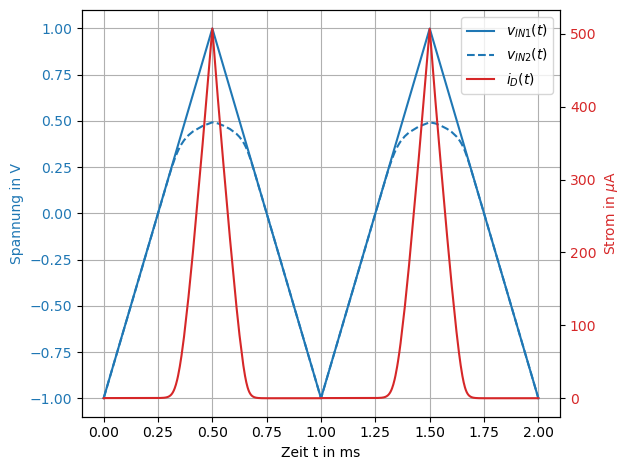

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Zeit t in ms')
ax1.set_ylabel('Spannung in V', color=color)
ax1.plot(t * 1e3, v_IN1, color=color, label=r'$v_{IN1}(t)$')
ax1.plot(t * 1e3,
         v_IN2,
         color=color,
         linestyle='dashed',
         label=r'$v_{IN2}(t)$')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# Zweite y-Achse
ax2 = ax1.twinx()

# Achsenbeschriftung ax2
color = 'tab:red'
ax2.set_ylabel(r'Strom in $\mu$A', color=color)
ax2.plot(t * 1e3, i_D * 1e6, color=color, label=r'$i_D(t)$')
ax2.tick_params(axis='y', labelcolor=color)

# Gemeinsame Legende für beide Achsen
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)

# Passt die zweite y-Achse an
fig.tight_layout()
plt.show()